In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline
import matplotlib.animation as animation
import csv
# matplotlib.style.use('seaborn')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from wordcloud import WordCloud

from mpl_toolkits.mplot3d import Axes3D

In [2]:
author_data=pd.read_csv("author_data.csv")
author_data.index=author_data.id
author_data=author_data[["gender","age","topic","sign","grupo_edad","Freq"]]
author_data.sample(20)

,gender,age,topic,sign,grupo_edad,Freq
id,,,,,,
4181358,female,13,Student,Leo,A,6
3810184,male,27,indUnk,Cancer,B,9
1572460,male,24,Student,Scorpio,B,43
3317230,male,25,Student,Gemini,B,10
3977191,male,15,Student,Virgo,A,11
3904281,male,17,indUnk,Taurus,A,28
669656,female,23,Advertising,Aries,B,7
4067088,male,36,Internet,Gemini,C,12
3779341,male,17,Student,Capricorn,A,6


In [3]:
words=pd.read_csv("frq_outh_complete_colnames.csv",header=None,index_col=None)

In [5]:
tfidf_data=pd.read_csv("frq_outh_complete_1.csv",header=None,index_col=None)#_2# This dataframe is already normalized to max val
tfidf_data.index=author_data.index
tfidf_data.columns=list(words[0])
tfidf_data=tfidf_data.apply(pd.to_numeric,downcast='unsigned')
tfidf_data.sample(20)

,though,school,always,ever,better,myself,let,year,another,many,...,president,english,cute,longer,internet,dead,rock,special,road,forget
id,,,,,,,,,,,,,,,,,,,,,
3569857,1,0,1,0,1,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3774367,1,0,1,1,3,4,1,3,2,4,...,0,0,0,0,0,0,0,0,0,0
3821963,1,0,0,1,0,2,0,3,1,0,...,0,0,0,0,0,0,0,0,1,0
3425453,0,3,1,2,0,4,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2392907,0,0,0,0,3,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3476516,15,9,13,9,10,19,10,25,8,12,...,2,0,4,3,3,1,0,1,1,0
4196591,0,0,0,0,2,1,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
4069027,1,2,4,1,2,3,3,6,0,3,...,0,0,0,1,0,0,0,0,0,4
3483118,1,0,3,0,0,0,2,1,0,4,...,0,0,1,0,0,1,3,0,0,0


## Reducción dimensional

### PCA

In [6]:
pca=PCA()
pca.fit(tfidf_data)
pca_coords=pca.transform(tfidf_data)

500

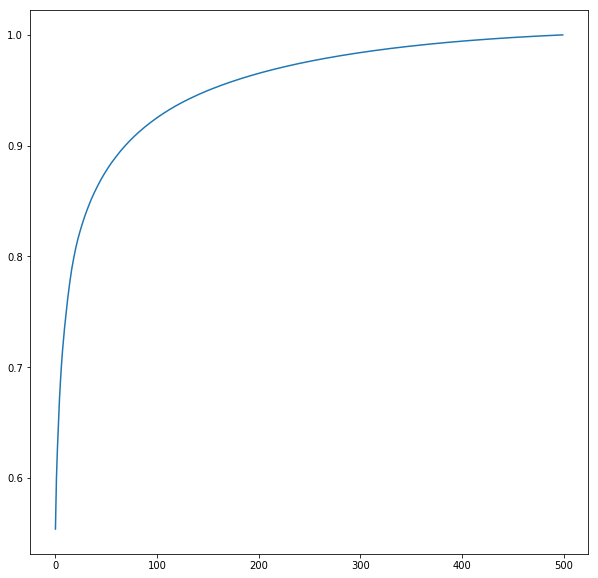

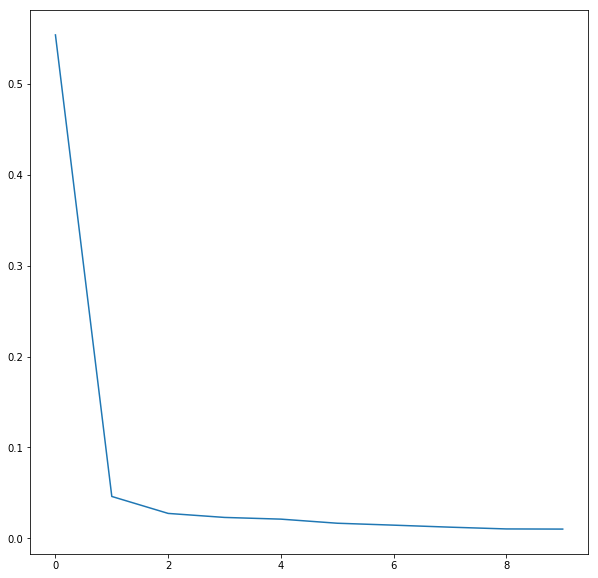

In [7]:
plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_.cumsum())
len(pca.explained_variance_ratio_)

plt.figure(figsize=(10,10))
plt.plot(pca.explained_variance_ratio_[:10])
len(pca.explained_variance_ratio_)

In [9]:
comps_pca_var=pd.DataFrame({"var_comp":pca.explained_variance_ratio_,
              "cumsum":pca.explained_variance_ratio_.cumsum()})

In [21]:
comps_pca_var[comps_pca_var["cumsum"]<=.82]

,cumsum,var_comp
0,0.553782,0.553782
1,0.599906,0.046124
2,0.627383,0.027477
3,0.650443,0.023060
4,0.671626,0.021183
5,0.688306,0.016680
6,0.702872,0.014566
7,0.715226,0.012354
8,0.725630,0.010404
9,0.735865,0.010234


In [22]:
auth_ward_PCA=hierarchy.linkage(pca_coords[:,:19], 'ward')#tfidf_data

In [24]:
# plt.figure(figsize=(15,35))
# dn_tf_PCA = hierarchy.dendrogram(auth_ward_PCA,orientation="left")
# plt.title('Ward Link Dendrogram')
# plt.show()

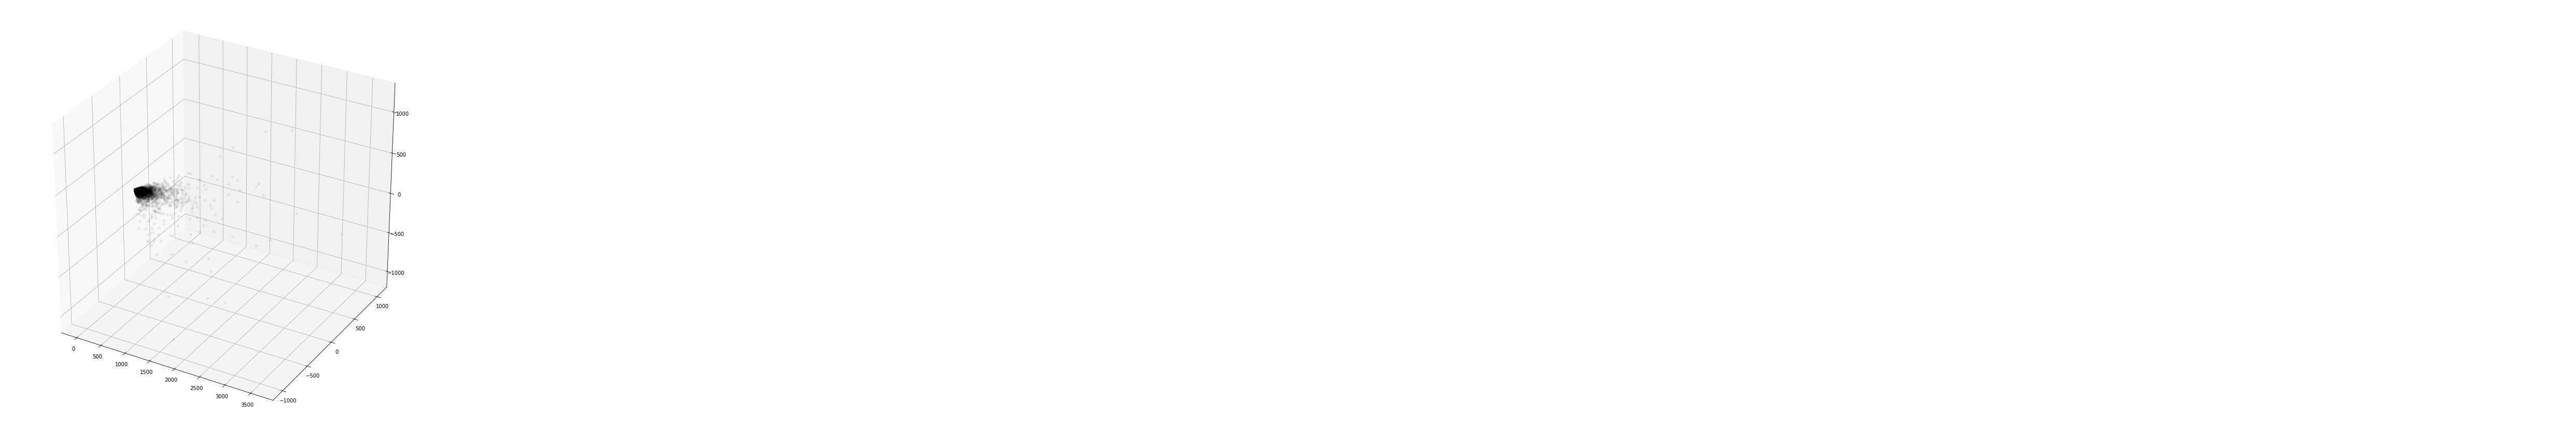

In [33]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pca_coords[:,0],
           ys=pca_coords[:,1],
           zs=pca_coords[:,2],
           c="black", 
           alpha=.05,
           cmap=plt.cm.Set1)

### Spectral Embedding

In [ ]:
# 3d Embedding for visualization
spect_emb_3=manifold.SpectralEmbedding(n_components=19, n_jobs=-1).fit_transform(tfidf_data)#author_data_norm)#

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=spect_emb_3[:,0],
           ys=spect_emb_3[:,1],
           zs=spect_emb_3[:,2],
           c="black", 
           alpha=.05,
           cmap=plt.cm.Set1)


In [ ]:
auth_ward_spect=hierarchy.linkage(spect_emb_3, 'ward')#tfidf_data

In [ ]:
plt.figure(figsize=(15,35))
dn_tf_spect = hierarchy.dendrogram(auth_ward_spect,orientation="left")
plt.title('Ward Link Dendrogram')
plt.show()

#### Conclusiones:

Se define trabajar spectral embedding con 19 dimensiones (tomadas de la varianza explicada del PCA al 80%) y se grafica en las 3 primeras dimensiones del spectral embedding.

# Clustering

In [ ]:
connectivity = kneighbors_graph(spect_emb_3, n_neighbors=20, include_self=False)
ward = AgglomerativeClustering(n_clusters=16, connectivity=connectivity,
                               linkage='ward').fit(spect_emb_3)
label = ward.labels_

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
for lb in np.unique(label):
    ax.scatter(spect_emb_3[label == lb, 0], 
               spect_emb_3[label == lb, 1], 
               spect_emb_3[label == lb, 2],
               color=plt.cm.Set1(float(lb) / np.max(label + 1)),
               s=20, edgecolor=None, alpha=.15)
plt.title('Ward Clustering Spectral embedding With connectivity constraints')
plt.show()

In [ ]:
pd.crosstab(index=label, columns="count")

In [ ]:
plt.figure(figsize=(10,30))
par_alf=0.1
plt.subplot(311)
plt.scatter(spect_emb_3[:,0],spect_emb_3[:,1], alpha=par_alf,s=45, c=label, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

plt.subplot(312)
plt.scatter(spect_emb_3[:,2],spect_emb_3[:,1], alpha=par_alf,s=45, c=label, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

plt.subplot(313)
plt.scatter(spect_emb_3[:,0],spect_emb_3[:,2], alpha=par_alf,s=45, c=label, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

## DBScan clustering

In [ ]:
dist_mat_3d=pairwise_distances(spect_emb_3)

In [ ]:
dist_vec=dist_mat_3d.flatten()

In [ ]:
plt.figure(figsize=(16,9))
# plt.hist(n_grams_tfidf_dist_mat.flatten())
sns.distplot(dist_vec)
# sns.kdeplot()

In [ ]:
freq_dists=pd.crosstab(index=np.round_(dist_vec[dist_vec<.6],3), columns="count")

In [ ]:
print(freq_dists.iloc[400:500,:])#.iloc[:50,:])
freq_dists.iloc[400:500,:].plot(kind="bar",figsize=(16,9))##.iloc[200:500,:]
#0.168

In [ ]:
max_eps=.475
min_eps=.45
eps_par=min_eps+((max_eps-min_eps)/2)
print(eps_par)

In [ ]:
db_scan = DBSCAN(eps=eps_par, min_samples=70).fit(spect_emb_3)#spect_emb_tfidf)
spect_db_labels = db_scan.labels_

In [ ]:
pd.crosstab(index=spect_db_labels, columns="count")

In [ ]:
plt.figure(figsize=(10,30))
par_alf=.01#(spect_db_labels>-.5)*.1#0.1
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

plt.subplot(311)
plt.scatter(spect_emb_3[spect_db_labels==-1,0],spect_emb_3[spect_db_labels==-1,1], alpha=0.05,s=45, c="gray", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==0,0],spect_emb_3[spect_db_labels==0,1], alpha=.1,s=45, c="#4daf4a", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==1,0],spect_emb_3[spect_db_labels==1,1], alpha=.1,s=45, c="#e41a1c", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==2,0],spect_emb_3[spect_db_labels==2,1], alpha=.1,s=45, c="#377eb8", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==3,0],spect_emb_3[spect_db_labels==3,1], alpha=.1,s=45, c="#984ea3", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==4,0],spect_emb_3[spect_db_labels==4,1], alpha=.1,s=45, c="#ff7f00", cmap=plt.cm.Set1)

plt.subplot(312)
plt.scatter(spect_emb_3[spect_db_labels==-1,2],spect_emb_3[spect_db_labels==-1,1], alpha=0.05,s=45, c="gray", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==0,2],spect_emb_3[spect_db_labels==0,1], alpha=.1,s=45, c="#4daf4a", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==1,2],spect_emb_3[spect_db_labels==1,1], alpha=.1,s=45, c="#e41a1c", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==2,2],spect_emb_3[spect_db_labels==2,1], alpha=.1,s=45, c="#377eb8", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==3,2],spect_emb_3[spect_db_labels==3,1], alpha=.1,s=45, c="#984ea3", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==4,2],spect_emb_3[spect_db_labels==4,1], alpha=.1,s=45, c="#ff7f00", cmap=plt.cm.Set1)

plt.subplot(313)
plt.scatter(spect_emb_3[spect_db_labels==-1,0],spect_emb_3[spect_db_labels==-1,2], alpha=0.05,s=45, c="gray", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==0,0],spect_emb_3[spect_db_labels==0,2], alpha=.1,s=45, c="#4daf4a", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==1,0],spect_emb_3[spect_db_labels==1,2], alpha=.1,s=45, c="#e41a1c", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==2,0],spect_emb_3[spect_db_labels==2,2], alpha=.1,s=45, c="#377eb8", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==3,0],spect_emb_3[spect_db_labels==3,2], alpha=.1,s=45, c="#984ea3", cmap=plt.cm.Set1)
# plt.scatter(spect_emb_3[spect_db_labels==4,0],spect_emb_3[spect_db_labels==4,2], alpha=.1,s=45, c="#ff7f00", cmap=plt.cm.Set1)


# Animate - Export 3d clusters

In [ ]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
for lb in np.unique(label):
    ax.scatter(spect_emb_3[label == lb, 0], 
               spect_emb_3[label == lb, 1], 
               spect_emb_3[label == lb, 2],
               color=plt.cm.Set1(float(lb) / np.max(label + 1)),
               s=20, edgecolor=None, alpha=.15)
plt.title('Ward Clustering Spectral embedding With connectivity constraints')
plt.show()
# plt.axis('off') # remove axes for visual appeal

def rotate(angle):
    ax.view_init(azim=angle)

# print("Making animation")
# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
# print("Saving Movie File")
# rot_animation.save('cluster_anim_3.mp4', writer=writer)
# print("Saving animated GIF File")
# rot_animation.save('whljgr_clustering_3.gif', dpi=80, writer='imagemagick')

In [ ]:
author_data["cluster"]=label
author_data["embd_x_coord"]=spect_emb_3[:,0]
author_data["embd_y_coord"]=spect_emb_3[:,1]
author_data["embd_z_coord"]=spect_emb_3[:,2]

In [ ]:
author_data.head(30)

In [ ]:
author_data.to_csv("author_data_clusters_2.csv")

# Explore Clusters

In [ ]:
pd.crosstab(index=author_data.topic, columns=author_data.cluster)

In [ ]:
pd.crosstab(index=author_data.grupo_edad, columns=author_data.cluster)

In [ ]:
pd.crosstab(index=[author_data.topic,author_data.grupo_edad], columns=author_data.cluster)

In [ ]:
centroides_median=np.array([[np.median(author_data.loc[author_data.cluster==clst,"embd_x_coord"]),
                             np.median(author_data.loc[author_data.cluster==clst,"embd_y_coord"]),
                             np.median(author_data.loc[author_data.cluster==clst,"embd_z_coord"])]
 for clst in list(set(author_data.cluster))])

In [ ]:
enumerate(list(set(author_data.cluster)))

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=spect_emb_3[:,0],
           ys=spect_emb_3[:,1],
           zs=spect_emb_3[:,2],
           c=label, 
           alpha=0.05,
           cmap=plt.cm.Set1)

# ax.scatter(xs=centroides_median[:,0],
#            ys=centroides_median[:,1],
#            zs=centroides_median[:,2], 
#            s=500)

for i, txt in enumerate(list(set(author_data.cluster))):
    ax.text(centroides_median[i,0],
            centroides_median[i,1],
            centroides_median[i,2],
            '%s' % (str(txt)), size=20, zorder=1, color='k')

plt.title("Ward's hierarchical clustering from spectral embedding" )

# Wordclouds

In [ ]:
# tfidf_data=pd.read_csv("tfidf_data_auth_416.csv",header=0,index_col="id")#("usr_txt_ftr_3.csv",header=0,index_col="id")
# del tfidf_data['Unnamed: 0']
tfidf_data.sample(20)
tfidf_data.shape

In [ ]:
author_tfidf=tfidf_data#pd.read_csv("usr_txt_ftr_3.csv",header=0,index_col="id")
# del author_tfidf['don']
# del author_tfidf['just']
print(author_tfidf.shape)
author_tfidf.sample(20)

In [ ]:
# author_data=pd.read_csv("author_data_clusters_2.csv",header=0,index_col="id")
# print(author_data.shape)
author_data.sample(20)

In [ ]:
clrs_wrdcld=matplotlib.colors.LinearSegmentedColormap.from_list("", [#'#a50026',
                                                                     '#d73027',
                                                                     '#f46d43',
                                                                     '#fdae61',
#                                                                      '#fee090',
#                                                                      '#ffffbf',
#                                                                      '#e0f3f8',
#                                                                      '#abd9e9',
                                                                     '#74add1',
                                                                     '#4575b4',
                                                                     '#313695'])

In [ ]:
pic_wide=900
def wrd_cld_dic_clust(clust_labels,clust_id,top_n=300):
    txt_freqs= author_tfidf[clust_labels==clust_id].sum(axis=0)
    indices = np.argsort(txt_freqs)[::-1]
    features =list(author_tfidf.columns)
    top_features = [[features[i],txt_freqs[i]] for i in indices[:top_n]]
    fr_dic={ str(features[i]).upper():txt_freqs[i] for i in indices[:top_n]}
    wc = WordCloud(width=pic_wide,  height=int(pic_wide*(9/21)), 
               background_color=None, mode="RGBA",min_font_size=8,
               colormap=clrs_wrdcld)#Dark2_r)#Paired_r)#tab10_r)#Set1_r) #
    wc.generate_from_frequencies(fr_dic)
    return wc

In [ ]:
for i, txt in enumerate(list(set(author_data.cluster))):
    plt.figure(figsize=(16,9))
    plt.imshow(wrd_cld_dic_clust(author_data.cluster,i,200), interpolation='bilinear')
    plt.axis("off")
    plt.title("Wordcloud Cluster "+ str(i))


## Significative frequent word by cluster

In [ ]:
freq_words_clust=((author_tfidf>0)*1).groupby(author_data.cluster).sum().T